# Traffic Accident Analysis

#### Importing the required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [14]:
df = pd.read_csv("D:/US_Accidents_March23.csv")
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Exploring the dataset

In [15]:
df.shape

(7728394, 46)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7728394,7728394,A-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,7728394,3,Source1,4325632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity,7728394.0,NaN,NaN,NaN,2.212384,0.487531,1.0,2.0,2.0,2.0,4.0
Start_Time,7728394,6131796,2021-01-26 16:16:13,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Time,7728394,6705355,2021-11-22 08:00:00,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Lat,7728394.0,NaN,NaN,NaN,36.201195,5.076079,24.5548,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,NaN,NaN,NaN,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,NaN,NaN,NaN,36.261829,5.272905,24.566013,33.46207,36.183495,40.17892,49.075
End_Lng,4325632.0,NaN,NaN,NaN,-95.72557,18.107928,-124.545748,-117.754345,-88.02789,-80.247086,-67.109242
Distance(mi),7728394.0,NaN,NaN,NaN,0.561842,1.776811,0.0,0.0,0.03,0.464,441.75


In [18]:
# checking for null and missing values
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [19]:
#dropping the columns with most null values
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [22]:
#filling the other blanks with mode value
modes = df.mode().iloc[0]
df = df.fillna(modes)

In [23]:
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

#### Exploratory data analysis

In [28]:
#Number of accidents per city
city_count = df['City'].value_counts()
print(city_count)

Miami                           187170
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64


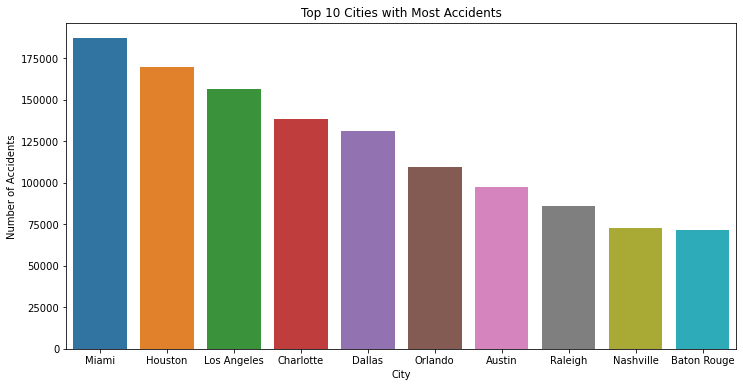

In [29]:
# Plotting the top 10 cities by number of accident
top_10_cities = city_count.head(10)

df_top_10_cities = df[df['City'].isin(top_10_cities.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', order=top_10_cities.index)
plt.title('Top 10 Cities with Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.show()

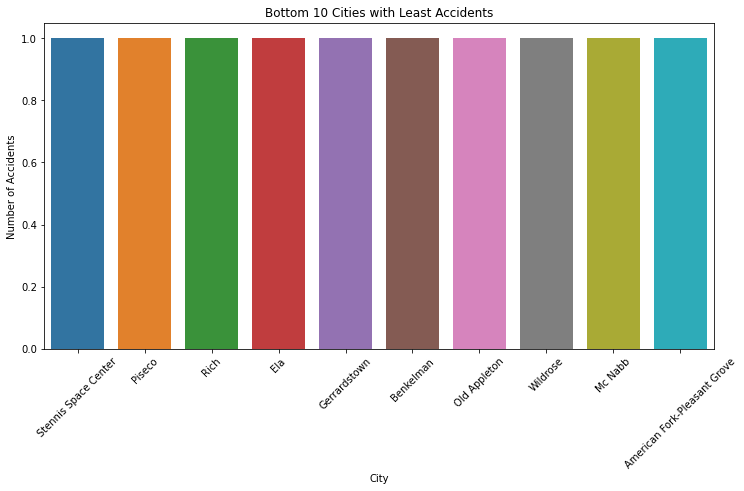

In [31]:
# 10 cities with least number of accidents
bottom_10_cities = city_count.tail(10)

df_bottom_10_cities = df[df['City'].isin(bottom_10_cities.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_bottom_10_cities, x='City', order=bottom_10_cities.index)
plt.title('Bottom 10 Cities with Least Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [32]:
#Number of accidents per state
state_count = df['State'].value_counts()
print(state_count)

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64


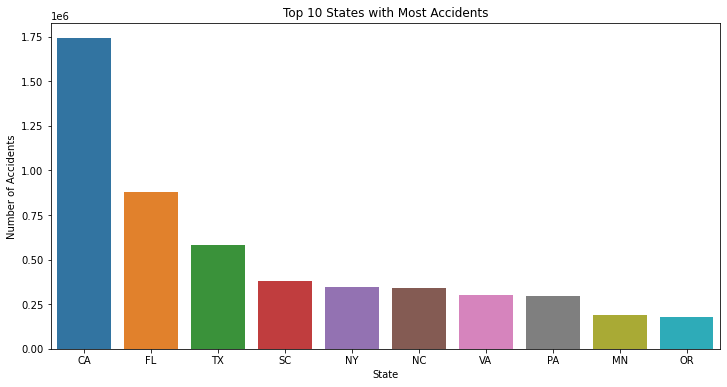

In [34]:
# Plotting the top 10 states by number of accident
top_10_states = state_count.head(10)

df_top_10_state = df[df['State'].isin(top_10_states.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_state, x='State', order=top_10_states.index)
plt.title('Top 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

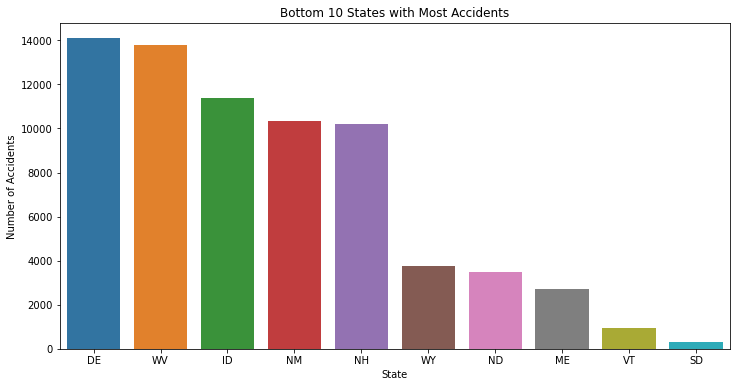

In [35]:
# Plotting the bottom 10 states by number of accident
bottom_10_states = state_count.tail(10)

df_bottom_10_state = df[df['State'].isin(bottom_10_states.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_bottom_10_state, x='State', order=bottom_10_states.index)
plt.title('Bottom 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

In [43]:
df['Severity'].value_counts()

2    6156981
3    1299337
4     204710
1      67366
Name: Severity, dtype: int64

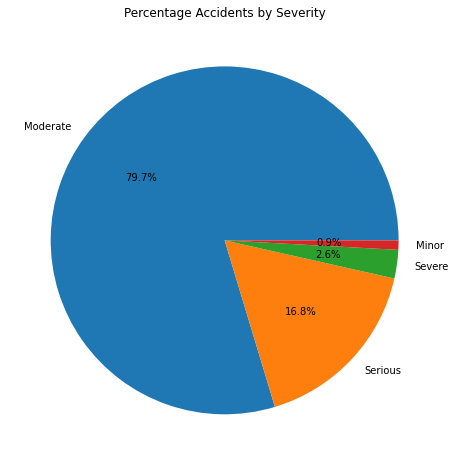

In [47]:
# Analyzing accidents based on severity

plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['Moderate','Serious','Severe','Minor'],autopct='%1.1f%%')
plt.title("Percentage Accidents by Severity")
plt.show()

In [48]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

df['Year'] = df['Start_Time'].dt.year

print(df[['Start_Time', 'Year']].head())

           Start_Time  Year
0 2016-02-08 05:46:00  2016
1 2016-02-08 06:07:59  2016
2 2016-02-08 06:49:27  2016
3 2016-02-08 07:23:34  2016
4 2016-02-08 07:39:07  2016


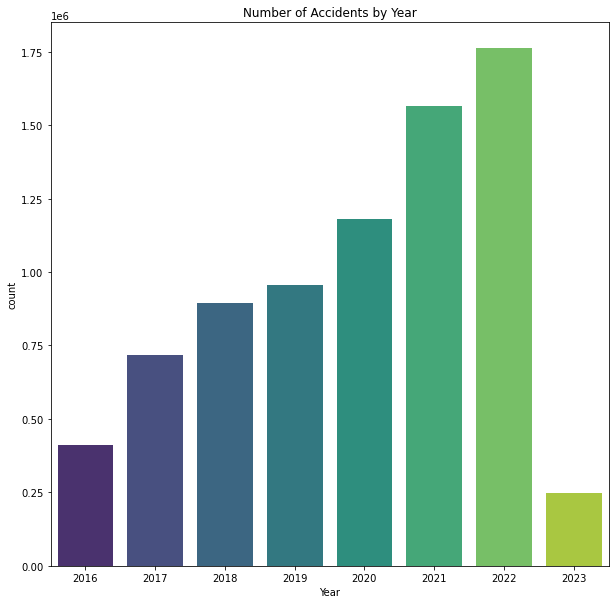

In [53]:
#number of accidents by year
plt.figure(figsize=(10,10))
sns.countplot(x='Year',data=df,palette='viridis')
plt.title("Number of Accidents by Year")
plt.show()

In [54]:
df['Hour'] = df['Start_Time'].dt.hour

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(categorize_time_of_day)

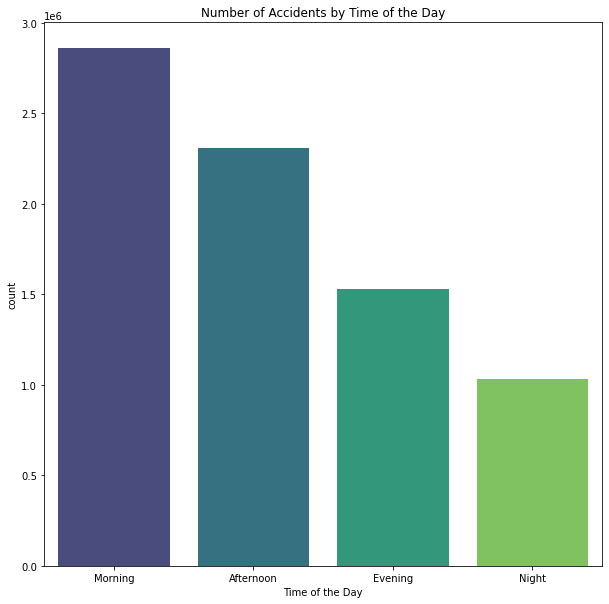

In [56]:
#number of accidents by time of the day
plt.figure(figsize=(10,10))
sns.countplot(x='Time_of_Day',data=df,palette='viridis')
plt.title("Number of Accidents by Time of the Day")
plt.xlabel("Time of the Day")
plt.show()

In [57]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Fair',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

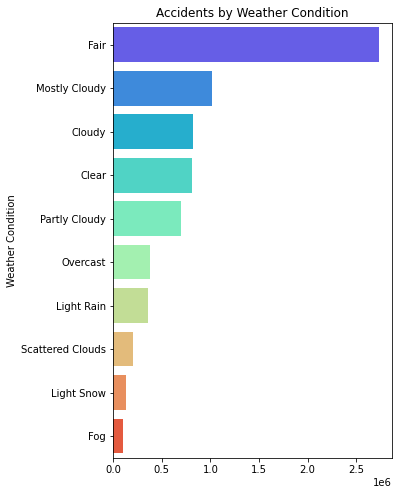

In [63]:
#Top 10 Number of accidents by weather condition
weather_count = df['Weather_Condition'].value_counts()
plt.figure(figsize=(5,8))
sns.barplot(y=weather_count.head(10).index,x=weather_count.head(10).values,data=df,palette='rainbow')
plt.ylabel('Weather Condition')
plt.title("Accidents by Weather Condition")
plt.show()

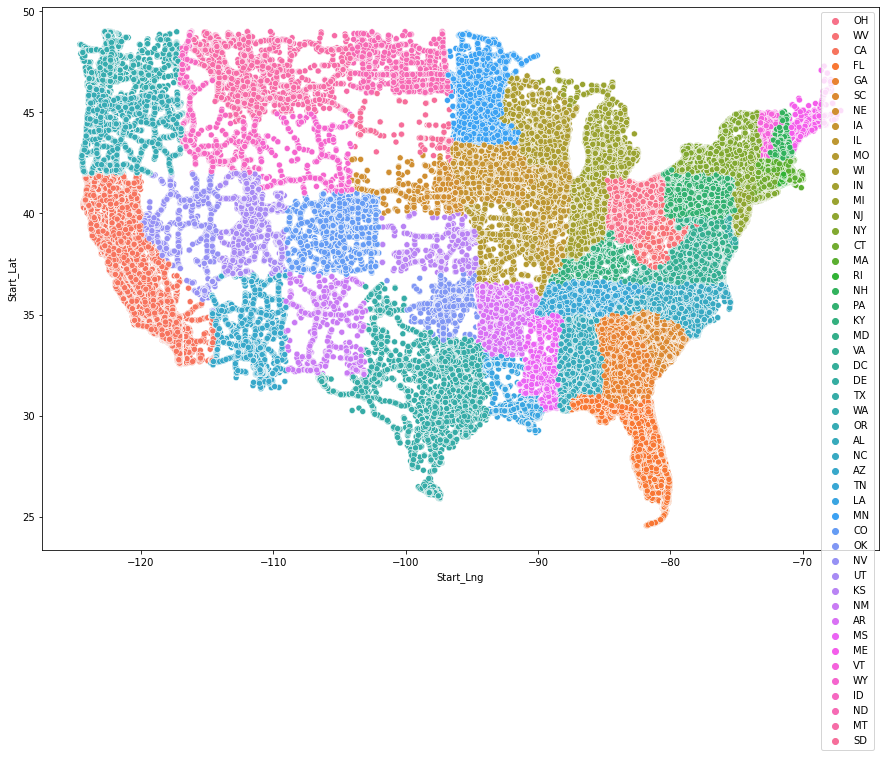

In [65]:
#Location of accidents by state
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],data=df,hue=df['State'])
plt.legend(loc='best')
plt.show()

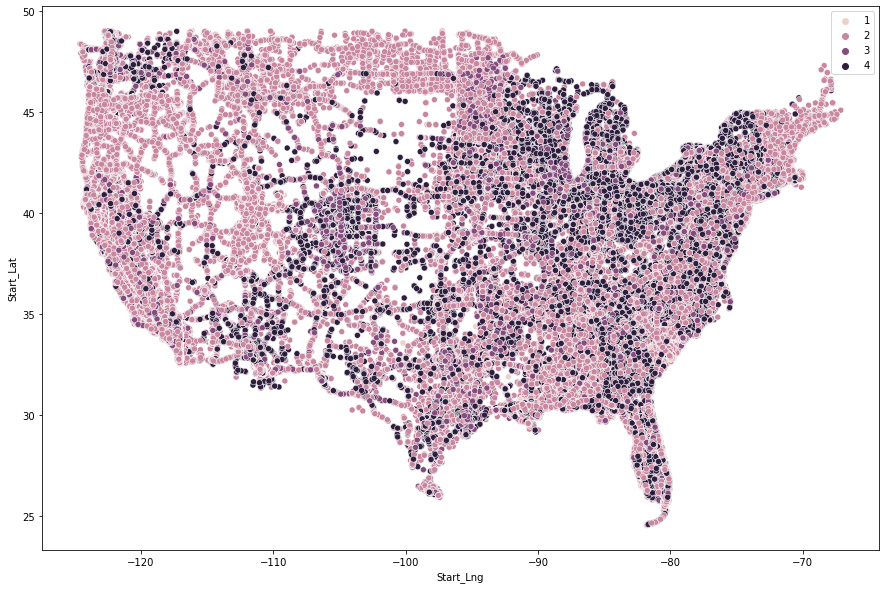

In [66]:
#Location of accidents by severity
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],data=df,hue=df['Severity'])
plt.legend(loc='best')
plt.show()